In [1]:
# Read file
import pandas as pd

raw_data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv', index_col='id')

# Print out 5 rows
raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [3]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Delete ID column
'''
Done while reading file
'''

'\nDone while reading file\n'

In [4]:
for column in raw_data.columns:
    # Change columns names to lowercase
    raw_data.rename(columns={column: column.lower()}, inplace=True)

In [5]:
# Get the list of numeric values
num_values = [col for col in raw_data.columns if raw_data[col].dtype in ['float64', 'int64']]
print(num_values)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [6]:
# Get the list of string values
str_values = [col for col in raw_data.columns if raw_data[col].dtype in ['str', 'object']]
print(str_values)

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


In [7]:
# Delete rows with NaN
raw_data.dropna(inplace=True, subset=['bmi'])

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [9]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
# Normalize (Do it in a pipeline)
# 
raw_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
raw_data.isna().sum().sum()

0

In [13]:
# Get unique values for object columns
unique_values_per_column = {col: raw_data[col].unique() for col in str_values}

# Display unique values for each column
for col, unique_vals in unique_values_per_column.items():
    print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'gender': ['Male' 'Female' 'Other']
Unique values in 'ever_married': ['Yes' 'No']
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'residence_type': ['Urban' 'Rural']
Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [14]:
raw_data['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [15]:
raw_data['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [16]:
raw_data['work_type'].value_counts()


work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [17]:
raw_data['residence_type'].value_counts(normalize=True)

residence_type
Urban    0.507232
Rural    0.492768
Name: proportion, dtype: float64

In [18]:
raw_data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [ ]:
# # Transfrom dataframe
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# scaler = StandardScaler()
# one = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# num_values_to_transform = ['age', 'avg_glucose_level', 'bmi']

# raw_data[num_values_to_transform] = scaler.fit_transform(raw_data[num_values_to_transform])
# # raw_data[str_values] = ohe.fit_transform(raw_data[str_values])

# raw_data.head()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_values_to_transform = ['age', 'avg_glucose_level', 'bmi']

ct = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), num_values_to_transform),
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), str_values)],
    remainder='passthrough'
)

# raw_data_ct = ct.fit_transform(raw_data)
# raw_data_ct
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('onehot',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'residence_type', 'smoking_status'])])

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=4, verbose=1)

model_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', rfc)
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=4, random_state=42, verbose=1))])

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate


X = raw_data.drop('stroke', axis=1)
y = raw_data['stroke']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scoring = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy']
# cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
cv_results = cross_validate(model_pipeline, X, y, cv=5, scoring=scoring, return_train_score=True)
cv_result = pd.DataFrame(cv_results)
cv_result

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

,fit_time,score_time,test_neg_log_loss,train_neg_log_loss,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
0,0.323190,0.100378,-0.214187,-0.032004,0.809625,1.0,0.955193,0.999745,0.498936,0.997006
1,0.247220,0.096087,-0.245816,-0.032283,0.806269,1.0,0.958248,0.999745,0.511905,0.997006
2,0.248314,0.095762,-0.184779,-0.032382,0.806687,1.0,0.954175,0.999745,0.498404,0.997006
3,0.246234,0.098340,-0.218358,-0.032524,0.793579,1.0,0.956212,0.999745,0.499468,0.997006
4,0.245795,0.097075,-0.282937,-0.032509,0.775908,1.0,0.957187,1.000000,0.511131,1.000000


In [22]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked


In [23]:
cv_result.sort_values(by='test_neg_log_loss', ascending=False)

,fit_time,score_time,test_neg_log_loss,train_neg_log_loss,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
2,0.248314,0.095762,-0.184779,-0.032382,0.806687,1.0,0.954175,0.999745,0.498404,0.997006
0,0.323190,0.100378,-0.214187,-0.032004,0.809625,1.0,0.955193,0.999745,0.498936,0.997006
3,0.246234,0.098340,-0.218358,-0.032524,0.793579,1.0,0.956212,0.999745,0.499468,0.997006
1,0.247220,0.096087,-0.245816,-0.032283,0.806269,1.0,0.958248,0.999745,0.511905,0.997006
4,0.245795,0.097075,-0.282937,-0.032509,0.775908,1.0,0.957187,1.000000,0.511131,1.000000


In [24]:
model_pipeline.fit(X, y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
c:\Users\Paul\miniconda3\envs\tf\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=4, random_state=42, verbose=1))])

C:\Users\Paul\AppData\Local\Temp\ipykernel_22084\3233794159.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=raw_data[predictor], y=raw_data[target], ci=None)


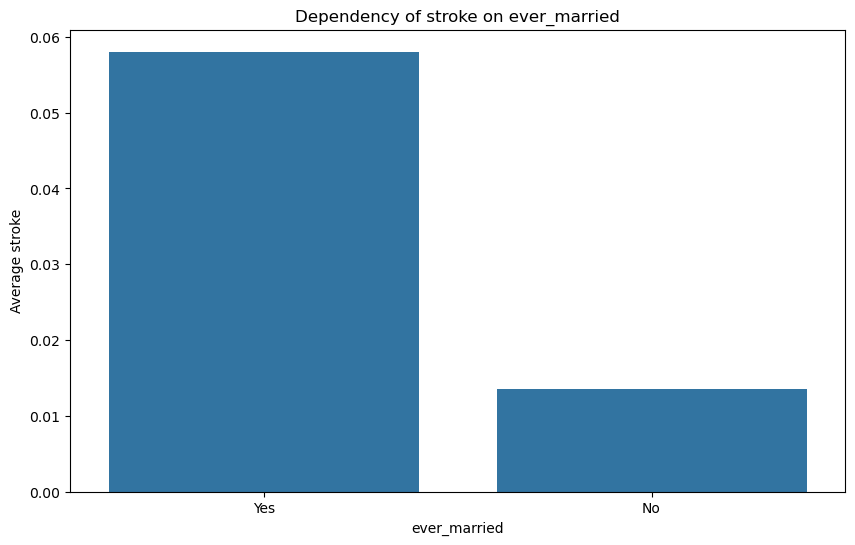

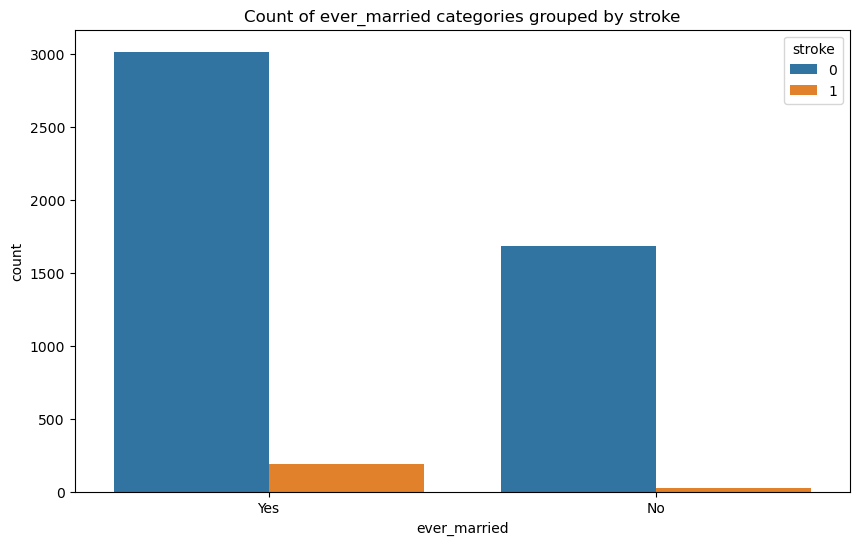

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# Bar plot for categorical predictor
predictor = 'ever_married'
target = 'stroke'

plt.figure(figsize=(10, 6))
sns.barplot(x=raw_data[predictor], y=raw_data[target], ci=None)
plt.title(f'Dependency of {target} on {predictor}')
plt.xlabel(predictor)
plt.ylabel(f'Average {target}')
plt.show()

# Count plot for category frequency
plt.figure(figsize=(10, 6))
sns.countplot(x=raw_data[predictor], hue=raw_data[target])
plt.title(f'Count of {predictor} categories grouped by {target}')
plt.show()

In [26]:
# My personal case

p_d = pd.read_csv('../data/test.csv', index_col='id')

# Add 20 more years to analyze
current_year = p_d.iloc[0]['age']

print(current_year)
for i in range(1, 21):
    p_d.loc[len(p_d)] = p_d.iloc[-1]  # Copy last row
    p_d.loc[len(p_d) - 1, 'age'] += 1  # Modify AGE in the new row
    p_d.loc[len(p_d) - 1, 'bmi'] *= 1.1  # Modify BMI in the new row
    p_d.loc[len(p_d) - 1, 'avg_glucose_level'] *= 1.1  # Modify avg_glucose_level in the new row

# Write to file
p_d.to_csv('../data/test_20_years_plus.csv')

# Print out first 5 rows
p_d.head()

41


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,41,0,0,Yes,Private,Urban,90.000,23.0000,never smoked
1,Male,42,0,0,Yes,Private,Urban,99.000,25.3000,never smoked
2,Male,43,0,0,Yes,Private,Urban,108.900,27.8300,never smoked
3,Male,44,0,0,Yes,Private,Urban,119.790,30.6130,never smoked
4,Male,45,0,0,Yes,Private,Urban,131.769,33.6743,never smoked


In [27]:
result = model_pipeline.predict(p_d)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [28]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
result_02 = model_pipeline.predict_proba(p_d)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [36]:
result_02

array([[1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.85, 0.15],
       [0.79, 0.21],
       [0.75, 0.25],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.67, 0.33],
       [0.68, 0.32],
       [0.68, 0.32]])

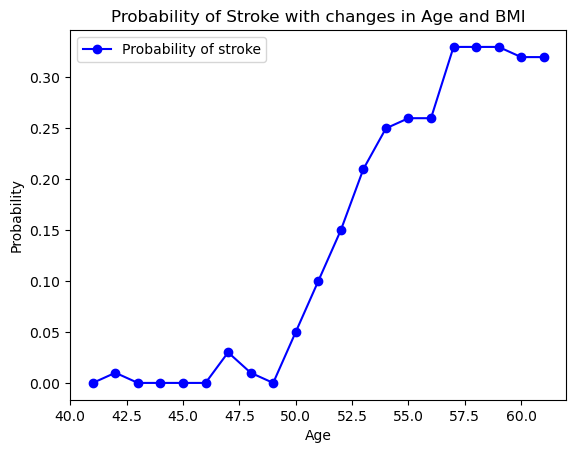

In [30]:
plt.plot(p_d['age'], result_02[:, 1], color='b',linestyle='-', marker='o', label='Probability of stroke')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability of Stroke with changes in Age and BMI')
plt.legend()
plt.show()

In [31]:
import joblib

joblib.dump(model_pipeline, '../models/stroke_model.pkl')

['../models/stroke_model.pkl']